<a href="https://colab.research.google.com/github/ChoiDae1/Machine-DeepLearing_Study/blob/main/%ED%95%A9%EC%84%B1%EA%B3%B1_%EC%8B%A0%EA%B2%BD%EB%A7%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from tensorflow import keras
from sklearn.model_selection import train_test_split
(train_input, train_target),(test_input, test_target) = keras.datasets.fashion_mnist.load_data()
train_scaled = train_input.reshape(-1, 28,28,1)/255.0
train_scaled, val_scaled, train_target, val_target = train_test_split(train_scaled, train_target, test_size=0.2, random_state=42)


4431872/4422102 [==============================] - 0s 0us/step


In [2]:
model = keras.Sequential()
model.add(keras.layers.Conv2D(32, kernel_size=3, activation='relu', padding='same', input_shape=(28,28,1)))
model.add(keras.layers.MaxPooling2D(2))
model.add(keras.layers.Conv2D(64, kernel_size=3, activation='relu', padding='same', input_shape=(28,28,1)))
model.add(keras.layers.MaxPooling2D(2))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dropout(0.4))
model.add(keras.layers.Dense(10, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 3136)              0         
                                                                 
 dense (Dense)               (None, 100)               3

In [3]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-cnn-model.h5')
early_stopping_cb = keras.callbacks.EarlyStopping(patience=2, restore_best_weights=True)
history = model.fit(train_scaled, train_target, epochs=20, validation_data=(val_scaled,val_target), callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/20
1500/1500 [==============================] - 24s 7ms/step - loss: 0.5227 - accuracy: 0.8139 - val_loss: 0.3140 - val_accuracy: 0.8847
Epoch 2/20
1500/1500 [==============================] - 10s 7ms/step - loss: 0.3468 - accuracy: 0.8770 - val_loss: 0.2695 - val_accuracy: 0.8980
Epoch 3/20
1500/1500 [==============================] - 10s 7ms/step - loss: 0.2947 - accuracy: 0.8926 - val_loss: 0.2602 - val_accuracy: 0.9025
Epoch 4/20
1500/1500 [==============================] - 10s 7ms/step - loss: 0.2646 - accuracy: 0.9054 - val_loss: 0.2312 - val_accuracy: 0.9153
Epoch 5/20
1500/1500 [==============================] - 10s 7ms/step - loss: 0.2403 - accuracy: 0.9117 - val_loss: 0.2260 - val_accuracy: 0.9157
Epoch 6/20
1500/1500 [==============================] - 10s 7ms/step - loss: 0.2214 - accuracy: 0.9189 - val_loss: 0.2206 - val_accuracy: 0.9178
Epoch 7/20
1500/1500 [==============================] - 10s 7ms/step - loss: 0.2038 - accuracy: 0.9244 - val_loss: 0.2217 - val_ac

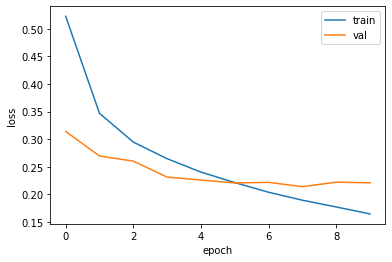

375/375 [==============================] - 1s 3ms/step - loss: 0.2139 - accuracy: 0.9237


[0.21393831074237823, 0.9236666560173035]

In [4]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()

model.evaluate(val_scaled,val_target)

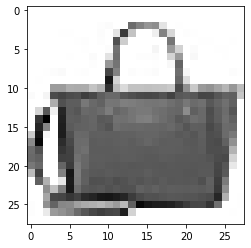

[[1.2390158e-15 1.9804320e-23 9.8744266e-21 1.6740653e-15 1.9282617e-17
  3.9202848e-13 1.3039176e-15 1.1788089e-16 1.0000000e+00 5.1966838e-17]]


In [5]:
plt.imshow(val_scaled[0].reshape(28,28),cmap='gray_r')
plt.show()
preds = model.predict(val_scaled[0:1])
print(preds)

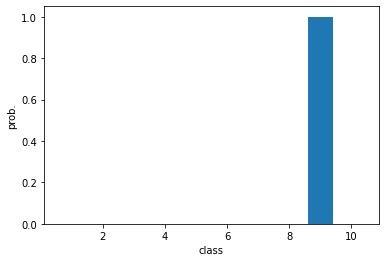

In [6]:
plt.bar(range(1,11), preds[0])
plt.xlabel('class')
plt.ylabel('prob.')
plt.show()
classes = ['티셔츠','바지','스웨터','드레스','코트','샌달','셔츠','스니커즈','가방','앵클 부츠']

In [7]:
import numpy as np
print(classes[np.argmax(preds)])
test_scaled =  test_input.reshape(-1,28,28,1)/255.0
model.evaluate(test_scaled, test_target)

가방
313/313 [==============================] - 2s 5ms/step - loss: 0.2395 - accuracy: 0.9149


[0.2395053654909134, 0.914900004863739]